In [3]:
# !pip update yfinance
# !pip install yfinance --upgrade --no-cache-dir
import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import pandas_datareader.data as web
import yfinance as yf

In [120]:
# cryptocurrencies = ['MATIC-USD','SOL-USD', 'ETH-USD']
# Equity: MSCI All-Country World Index, MXWD
# Bloomberg Barclays US Government Inflation-Linked 7 to 10 Years, BCIT5T
'''
Dependent Variable (y)= MATIC-USD
Independent Variables (Xi)= see below

Asset - Proxy Ticker
Equity: iShares MSCI ACWI ETF, ACWI
Bonds: Bloomberg Barclays Global Aggregate Bond, LEGATRUU
Bonds Alternative: Templeton Global Bond Fund (TPINX)
Commodities: S&P GSCI Total Return, ^SPGSCITR
Commodities(Alternative):DBC
Market Volatility: VIX
Rates: Bloomberg Barclays Global Government 7 to 10 Years Hedged to USD, LGY7TRUH
Credit:. Fidelity Global Credit Fund (FGBFX)
Emg Mkts:

MATIC ~ BTC + ETH+ ACWI + VIX + DBC + Gold + Oil (CL=F) + FGBFX + TPINX + BAA10Y + DX-Y.NYB (DXY Futures)

'''

'''
https://fred.stlouisfed.org/series/BAA10Y
Daily corporate bond data 
BAA10Y shows daily returns over past 36 months
'''


bond_data=pd.read_csv('BAA10Y.csv')
bond_data.rename(columns = {'BAA10Y_PCH':'BAA10Y'},inplace = True)
em_currency=pd.read_csv('MSCI Intl Emerging Market Currency Historical Data.csv')
# bond_data.rename(columns = {'DATE':'Date'},inplace=True)

securities = ['MATIC-USD','ETH-USD','ACWI', '^VIX', 'MMN=F', 'CL=F', 'GLD','FGBFX','TPINX', 'DX-Y.NYB' ]
securities2 = ['MATIC-USD','BTC-USD','ETH-USD','ACWI', '^VIX', 'MMN=F', 'CL=F', 'GLD','FGBFX','TPINX', 'DX-Y.NYB' ]
sec_data = yf.download(securities, period = "36mo",ignore_tz = True)

bond_data

[*********************100%***********************]  10 of 10 completed


,DATE,BAA10Y
0,3/26/18,-1.60428
1,3/27/18,1.08696
2,3/28/18,0.00000
3,3/29/18,-0.53763
4,4/3/18,-1.07527
...,...,...
1186,3/20/23,-0.90498
1187,3/21/23,-3.65297
1188,3/22/23,2.36967
1189,3/23/23,4.62963


In [121]:
em_currency['Date'] = pd.to_datetime(em_currency['Date'])
em_currency.set_index('Date', inplace=True)

em_currency=em_currency[['Price']]
em_currency.rename(columns={'Price':'em_currency'},inplace=True)
em_currency=em_currency.sort_index()
em_currency['em_currency'] = em_currency['em_currency'].str.replace(',', '').astype(float)
em_currency['em_currency']=em_currency['em_currency'].pct_change()

em_currency=em_currency[['em_currency']]

In [128]:
em_currency

,em_currency
Date,
2019-03-25,NaN
2019-03-26,-0.000996
2019-03-27,-0.003883
2019-03-28,-0.001318
2019-03-29,0.002339
...,...
2023-03-20,-0.000734
2023-03-21,0.001039
2023-03-22,0.000692


In [87]:
sec_data['Adj Close']

,ACWI,CL=F,DX-Y.NYB,ETH-USD,FGBFX,GLD,MATIC-USD,MMN=F,TPINX,^VIX
Date,,,,,,,,,,
2020-03-27,NaN,21.510000,98.370003,NaN,NaN,NaN,NaN,393.299988,NaN,NaN
2020-03-28,NaN,NaN,NaN,130.986496,NaN,NaN,0.010646,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,125.583733,NaN,NaN,0.010094,NaN,NaN,NaN
2020-03-30,59.927715,20.090000,99.180000,132.904541,7.944504,152.919998,0.010778,399.500000,8.769571,57.080002
2020-03-31,59.480923,20.480000,99.050003,133.593567,7.953341,148.050003,0.011043,402.799988,8.813199,53.540001
...,...,...,...,...,...,...,...,...,...,...
2023-03-24,88.059998,69.260002,103.120003,1752.044800,7.410000,183.649994,1.097398,501.299988,7.950000,21.740000
2023-03-25,NaN,NaN,NaN,1743.764771,NaN,NaN,1.079204,NaN,NaN,NaN
2023-03-26,NaN,NaN,NaN,1775.676758,NaN,NaN,1.105598,NaN,NaN,NaN


In [124]:
bond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1191 non-null   object 
 1   BAA10Y  1191 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.7+ KB


In [88]:
print(len(bond_data))
sec_data=sec_data.dropna()
print(len(sec_data))

#Set index to Date for Bond Data
bond_data['Date'] = pd.to_datetime(bond_data['DATE'])
bond_data.set_index('Date',inplace=True)
del bond_data['DATE']
bond_data

1191
752


,BAA10Y
Date,
2018-03-26,-1.60428
2018-03-27,1.08696
2018-03-28,0.00000
2018-03-29,-0.53763
2018-04-03,-1.07527
...,...
2023-03-20,-0.90498
2023-03-21,-3.65297
2023-03-22,2.36967


In [89]:
reg_df=sec_data['Adj Close'].pct_change()

reg_df

,ACWI,CL=F,DX-Y.NYB,ETH-USD,FGBFX,GLD,MATIC-USD,MMN=F,TPINX,^VIX
Date,,,,,,,,,,
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-31,-0.007456,0.019413,-0.001311,0.005184,0.001112,-0.031847,0.024587,0.008260,0.004975,-0.062018
2020-04-01,-0.045869,-0.008301,0.006259,0.015278,0.001111,0.009456,0.021643,-0.041460,0.003960,0.065745
2020-04-02,0.020100,0.246677,0.005117,0.047146,0.002220,0.016393,0.023932,0.031339,-0.001972,-0.107781
2020-04-03,-0.014942,0.119273,0.003993,0.000438,0.000780,0.004937,0.002251,-0.018584,0.000000,-0.080731
...,...,...,...,...,...,...,...,...,...,...
2023-03-20,0.009703,0.013485,-0.004146,-0.031891,-0.014765,0.000381,-0.098328,0.009405,0.005102,-0.053312
2023-03-21,0.013271,0.024985,-0.000194,0.041168,0.004087,-0.018875,0.047469,0.009604,-0.003807,-0.114700
2023-03-22,-0.010726,0.022645,-0.008813,-0.038214,0.005427,0.017021,-0.040255,0.004048,0.008917,0.041160


In [127]:
'''
https://fred.stlouisfed.org/series/BAA10Y
Daily corporate bond data
'''

# # reg_df.join(bond_data, how='inner')
# reg_df=pd.merge(reg_df,bond_data,on='Date')
reg_df=pd.concat([reg_df,bond_data,em_currency],axis=1,join = 'inner')
print(len(reg_df))
reg_df

711


,ACWI,CL=F,DX-Y.NYB,ETH-USD,FGBFX,GLD,MATIC-USD,MMN=F,TPINX,^VIX,BAA10Y,em_currency
Date,,,,,,,,,,,,
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.26131,-0.005185
2020-03-31,-0.007456,0.019413,-0.001311,0.005184,0.001112,-0.031847,0.024587,0.008260,0.004975,-0.062018,1.02828,0.001979
2020-04-01,-0.045869,-0.008301,0.006259,0.015278,0.001111,0.009456,0.021643,-0.041460,0.003960,0.065745,1.01781,-0.004448
2020-04-02,0.020100,0.246677,0.005117,0.047146,0.002220,0.016393,0.023932,0.031339,-0.001972,-0.107781,-1.25945,0.000090
2020-04-03,-0.014942,0.119273,0.003993,0.000438,0.000780,0.004937,0.002251,-0.018584,0.000000,-0.080731,0.00000,-0.001637
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,0.009703,0.013485,-0.004146,-0.031891,-0.014765,0.000381,-0.098328,0.009405,0.005102,-0.053312,-0.90498,-0.000734
2023-03-21,0.013271,0.024985,-0.000194,0.041168,0.004087,-0.018875,0.047469,0.009604,-0.003807,-0.114700,-3.65297,0.001039
2023-03-22,-0.010726,0.022645,-0.008813,-0.038214,0.005427,0.017021,-0.040255,0.004048,0.008917,0.041160,2.36967,0.000692


In [129]:
# reg_df=reg_df.dropna(inplace=True)

cols = reg_df.columns.tolist()
sorted_cols = ['MATIC-USD','ETH-USD','ACWI', 'MMN=F','^VIX','CL=F','GLD','FGBFX','TPINX', 'DX-Y.NYB','BAA10Y','em_currency']


sorted_cols_trunc = sorted_cols[:-1]

df = reg_df[sorted_cols]
df

,MATIC-USD,ETH-USD,ACWI,MMN=F,^VIX,CL=F,GLD,FGBFX,TPINX,DX-Y.NYB,BAA10Y,em_currency
Date,,,,,,,,,,,,
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.26131,-0.005185
2020-03-31,0.024587,0.005184,-0.007456,0.008260,-0.062018,0.019413,-0.031847,0.001112,0.004975,-0.001311,1.02828,0.001979
2020-04-01,0.021643,0.015278,-0.045869,-0.041460,0.065745,-0.008301,0.009456,0.001111,0.003960,0.006259,1.01781,-0.004448
2020-04-02,0.023932,0.047146,0.020100,0.031339,-0.107781,0.246677,0.016393,0.002220,-0.001972,0.005117,-1.25945,0.000090
2020-04-03,0.002251,0.000438,-0.014942,-0.018584,-0.080731,0.119273,0.004937,0.000780,0.000000,0.003993,0.00000,-0.001637
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,-0.098328,-0.031891,0.009703,0.009405,-0.053312,0.013485,0.000381,-0.014765,0.005102,-0.004146,-0.90498,-0.000734
2023-03-21,0.047469,0.041168,0.013271,0.009604,-0.114700,0.024985,-0.018875,0.004087,-0.003807,-0.000194,-3.65297,0.001039
2023-03-22,-0.040255,-0.038214,-0.010726,0.004048,0.041160,0.022645,0.017021,0.005427,0.008917,-0.008813,2.36967,0.000692


In [130]:
df=df.dropna()

In [131]:
df.corr()

,MATIC-USD,ETH-USD,ACWI,MMN=F,^VIX,CL=F,GLD,FGBFX,TPINX,DX-Y.NYB,BAA10Y,em_currency
MATIC-USD,1.000000,0.637773,0.308072,0.291336,-0.239913,0.047709,0.111323,0.061890,0.201128,-0.221359,-0.008534,0.125033
ETH-USD,0.637773,1.000000,0.393019,0.357017,-0.331198,0.022106,0.139171,0.091004,0.248137,-0.245075,-0.032429,0.166911
ACWI,0.308072,0.393019,1.000000,0.805105,-0.720971,0.121950,0.218972,0.172275,0.415934,-0.469837,-0.086443,0.291167
MMN=F,0.291336,0.357017,0.805105,1.000000,-0.571524,0.102045,0.257263,0.130736,0.461018,-0.461263,-0.110976,0.432694
^VIX,-0.239913,-0.331198,-0.720971,-0.571524,1.000000,-0.112817,-0.142706,-0.059310,-0.316423,0.259375,0.072780,-0.142412
CL=F,0.047709,0.022106,0.121950,0.102045,-0.112817,1.000000,0.026677,0.014507,0.038665,-0.048729,-0.017677,0.060207
GLD,0.111323,0.139171,0.218972,0.257263,-0.142706,0.026677,1.000000,0.277580,0.454761,-0.480306,0.234497,0.218108
FGBFX,0.061890,0.091004,0.172275,0.130736,-0.059310,0.014507,0.277580,1.000000,0.367427,-0.288639,0.031091,0.230233
TPINX,0.201128,0.248137,0.415934,0.461018,-0.316423,0.038665,0.454761,0.367427,1.000000,-0.595012,0.139696,0.423861
DX-Y.NYB,-0.221359,-0.245075,-0.469837,-0.461263,0.259375,-0.048729,-0.480306,-0.288639,-0.595012,1.000000,-0.091092,-0.438450


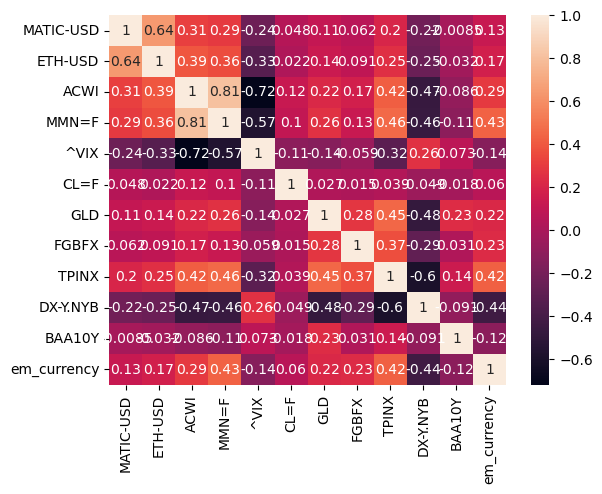

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True);

In [133]:
df.rename(columns = {'MATIC-USD':'MATIC','ETH-USD':'ETH','^VIX':'VIX','CL=F':'Oil' ,'MMN=F':'MMN','DX-Y.NYB':'DXY_USD'}, inplace = True)

/var/folders/y1/fzq6mttx6fb2fs_14z8crtcm0000gn/T/ipykernel_62865/1723446963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'MATIC-USD':'MATIC','ETH-USD':'ETH','^VIX':'VIX','CL=F':'Oil' ,'MMN=F':'MMN','DX-Y.NYB':'DXY_USD'}, inplace = True)


In [134]:
import statsmodels.formula.api as smf

In [98]:
df.reset_index(inplace=True)

In [135]:
smf.ols('MATIC ~ ETH + ACWI + MMN + VIX + GLD + Oil +  DXY_USD + FGBFX + TPINX + BAA10Y + em_currency', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  MATIC   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     45.04
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           5.42e-74
Time:                        21:11:08   Log-Likelihood:                 894.58
No. Observations:                 710   AIC:                            -1765.
Df Residuals:                     698   BIC:                            -1710.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0063      0.003      2.387      0.017       0.001       0.011
ETH             0.9771      0.051     19.119      0.000       0.877       1.077
ACWI            0.1478      0.454      0.325      0.745      -0.744       1.040
MMN             0.3676      0.360      1.021      0.308      -0.339       1.075
VIX             0.0234      0.049      0.475      0.635      -0.074       0.120
GLD            -0.1345      0.320     -0.421      0.674      -0.762       0.493
Oil             0.0192      0.020      0.951      0.342      -0.020       0.059
DXY_USD        -1.1417      0.813     -1.404      0.161      -2.738       0.455
FGBFX          -0.3491      0.834     -0.419      0.676      -1.987       1.289
TPINX           0.1905      0.892      0.214      0.831      -1.561       1.942
BAA10Y          0.0007      0.002      0.399      0.690      -0.003       0.004
em_currency    -0.8971      1.228     -0.730      0.465      -3.309       1.515
==============================================================================
Omnibus:                      396.487   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4911.484
Skew:                           2.242   Prob(JB):                         0.00
Kurtosis:                      15.080   Cond. No.                         756.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
smf.ols('MATIC ~ BTC + ETH', data=df).fit().summary()
# + ACWI + MMN + VIX + Gold + Oil + FGBFX + TPINX + BAA10Y

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  MATIC   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     276.3
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           2.25e-90
Time:                        15:20:31   Log-Likelihood:                 936.38
No. Observations:                 744   AIC:                            -1867.
Df Residuals:                     741   BIC:                            -1853.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0052      0.003      2.059      0.040       0.000       0.010
BTC            0.4117      0.096      4.287      0.000       0.223       0.600
ETH            0.7559      0.070     10.730      0.000       0.618       0.894
==============================================================================
Omnibus:                      421.991   Durbin-Watson:                   1.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5211.470
Skew:                           2.300   Prob(JB):                         0.00
Kurtosis:                      15.122   Cond. No.                         44.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""